# Sequential Data Analysis

In [1]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

def parser(x):
    return pd.datetime.strptime('2015'+x, '%Y%d/%m/%H %M')

data = read_csv('./BATADAL_dataset03.csv', header=0, parse_dates=[0], index_col=0, squeeze=True,\
                  date_parser=parser)

series = data.copy()

In [2]:
#delete those columns only with 0 value
ori_columns = series.columns.values
size = len(series.columns)
for i in range(size):
    a = series.iloc[:,i]
    if sum(a)==0:
        data = data.drop(ori_columns[i], axis = 1)

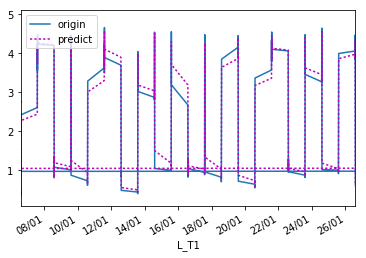

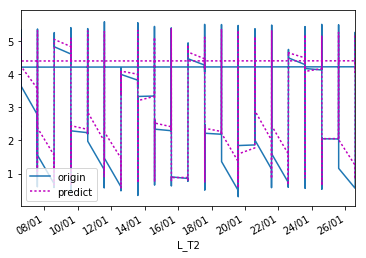

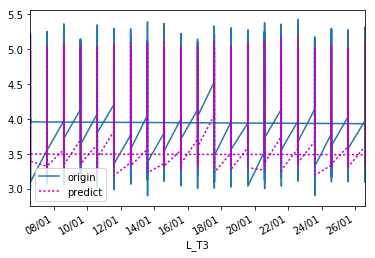

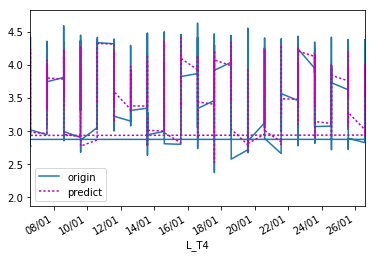

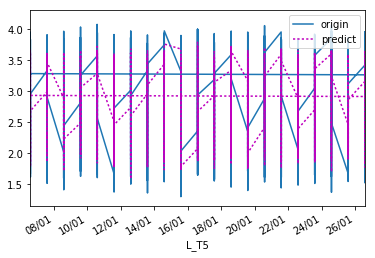

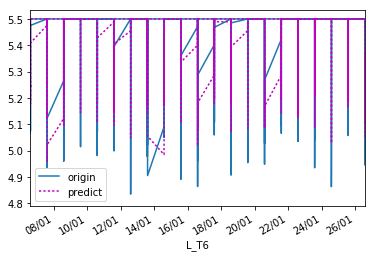

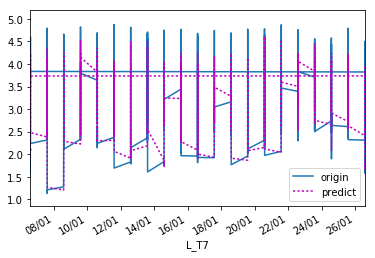

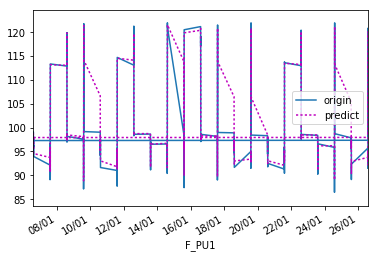

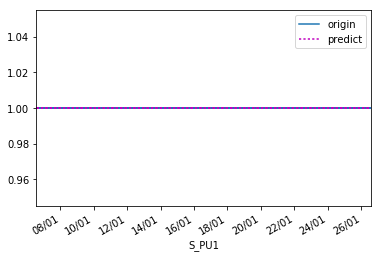

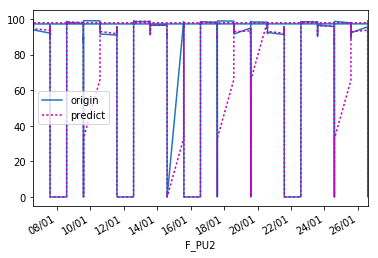

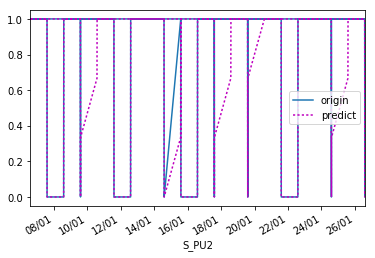

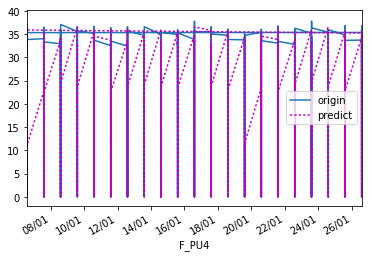

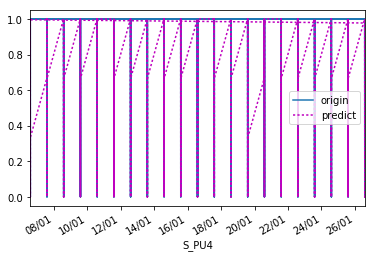

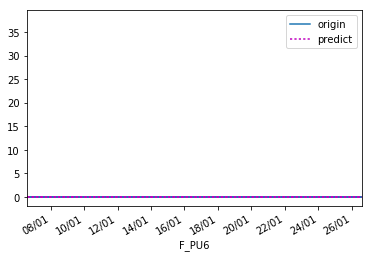

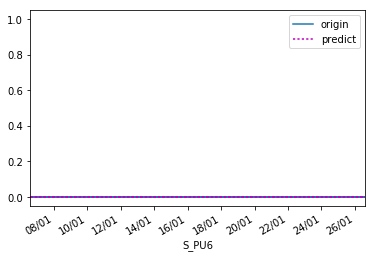

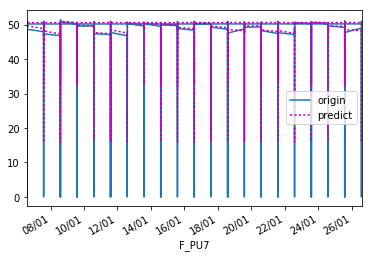

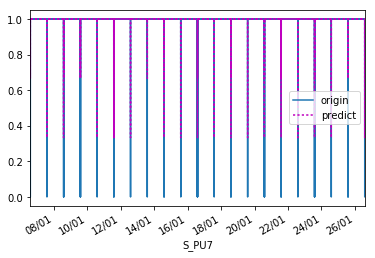

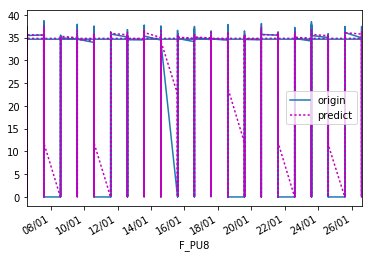

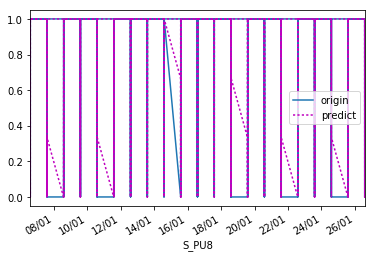

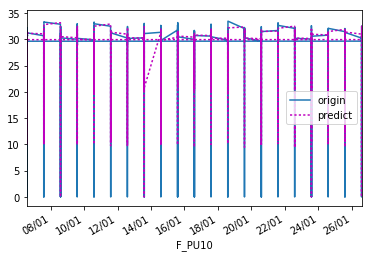

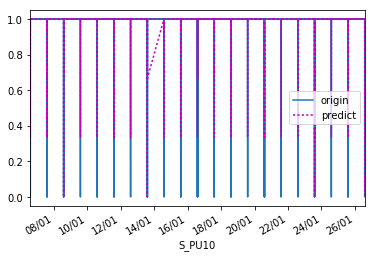

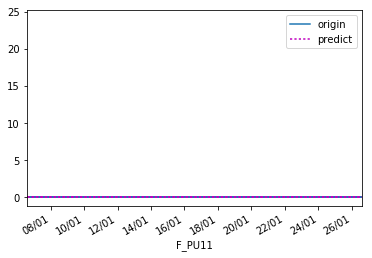

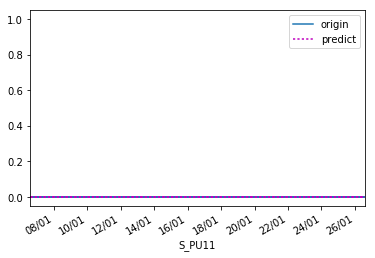

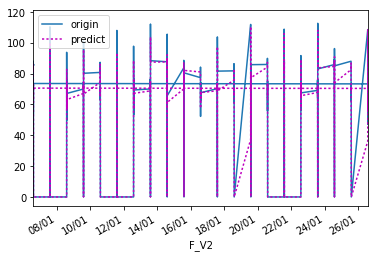

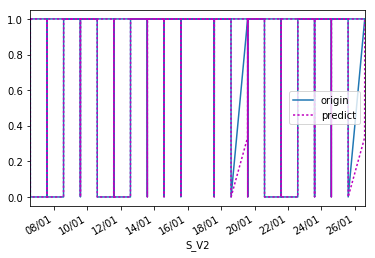

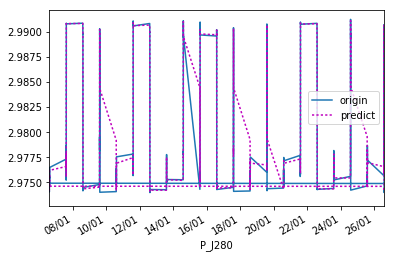

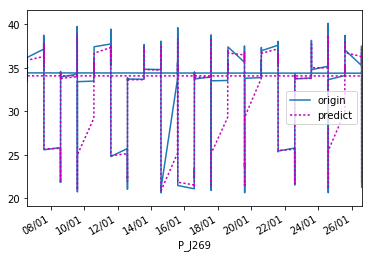

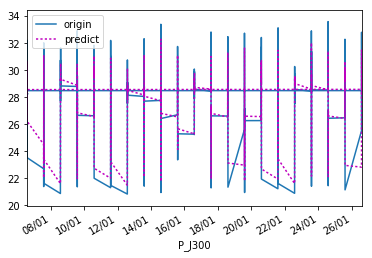

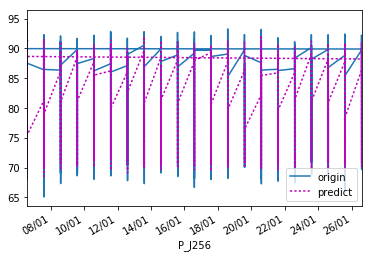

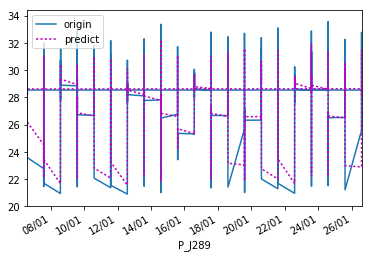

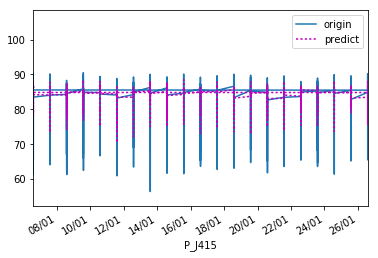

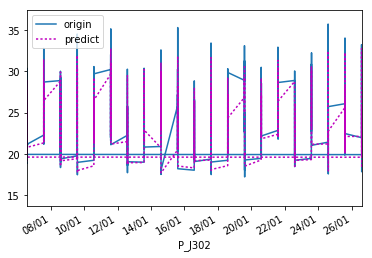

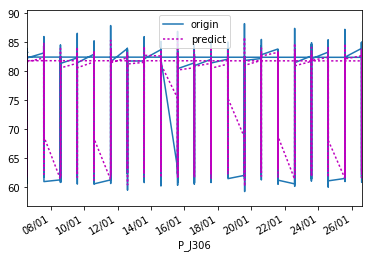

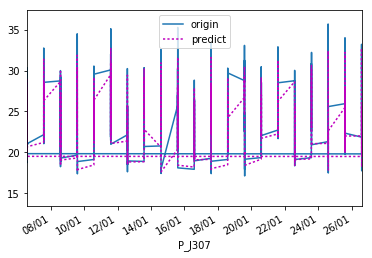

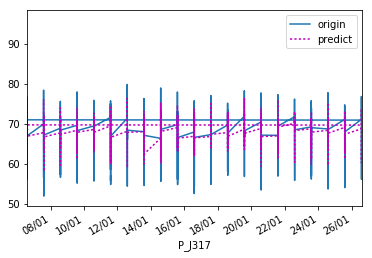

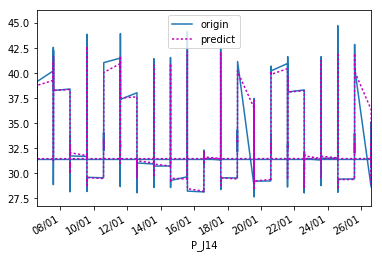

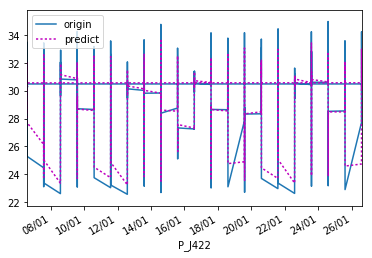

In [3]:
#print(series.head())

import matplotlib.dates as mdates

for i in range(len(data.columns)):
    a = data.iloc[:,i]
    
    # Tail-rolling average transform
    rolling = a.rolling(window=3)
    rolling_mean = rolling.mean()
    # plot
    fig, ax = plt.subplots()
    plt.plot(a.index, a.values,label='origin')
    plt.plot(a.index,rolling_mean,'m:',label='predict')
    plt.legend()
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%d/%m')
    plt.gca().xaxis.set_major_formatter(myFmt)
    plt.xlim(a.index.values[0],a.index.values[500])
    plt.xlabel(str(data.columns.values[i]))
    plt.show()


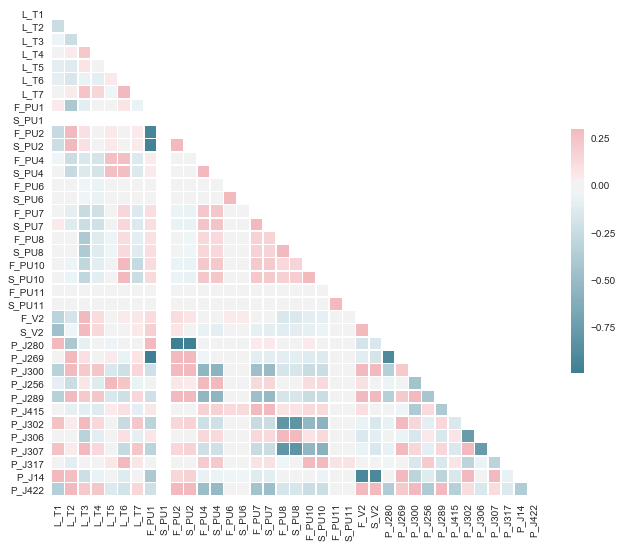

In [4]:
import seaborn as sns

sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


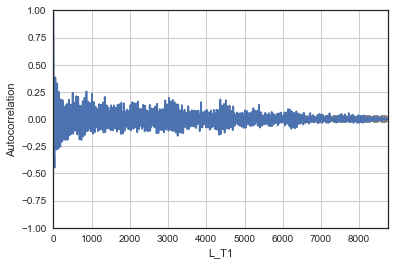

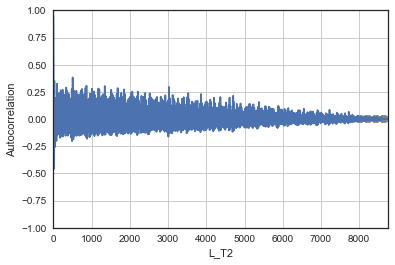

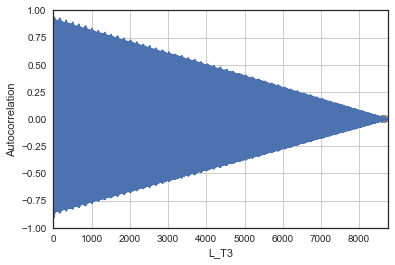

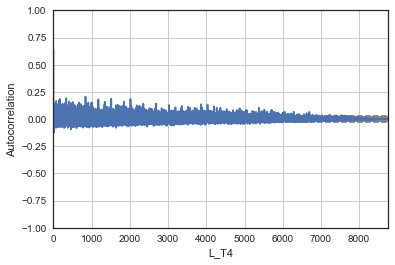

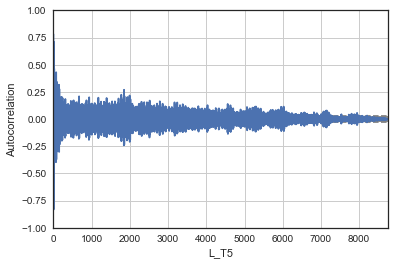

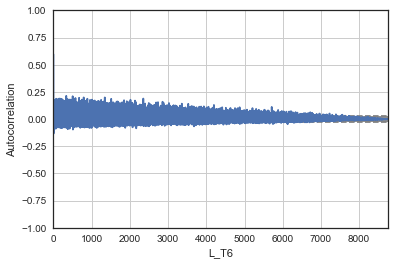

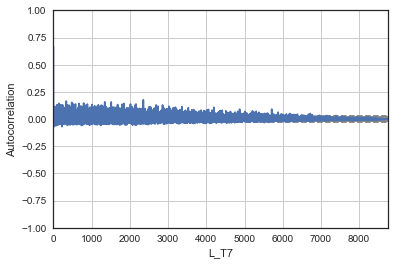

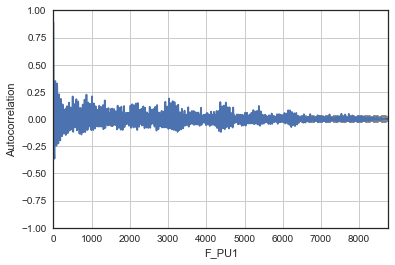

/usr/local/lib/python2.7/dist-packages/pandas/plotting/_misc.py:629: RuntimeWarning: invalid value encountered in double_scalars
  (data[h:] - mean)).sum() / float(n) / c0


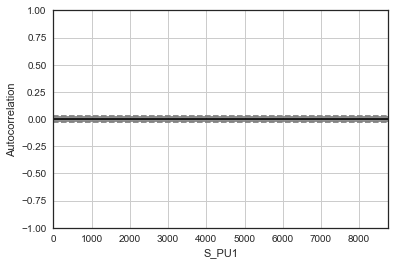

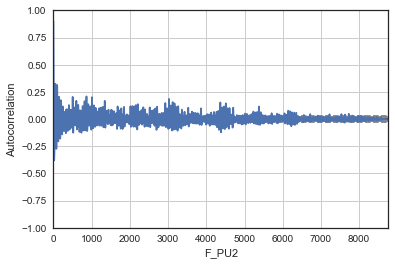

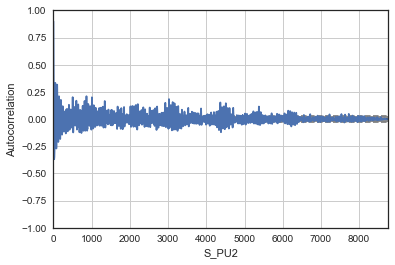

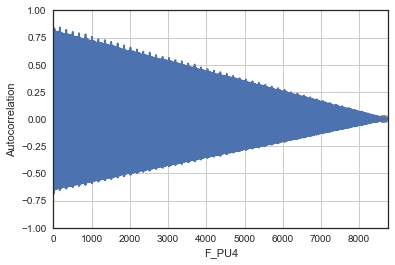

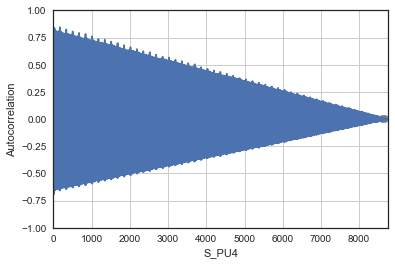

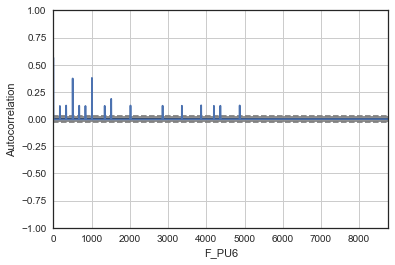

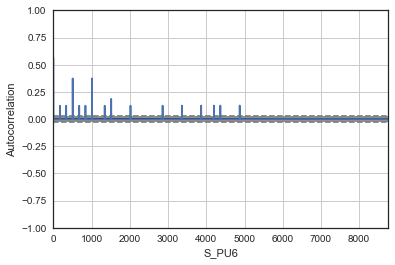

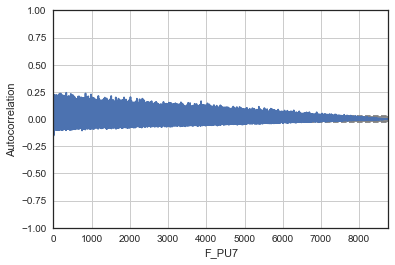

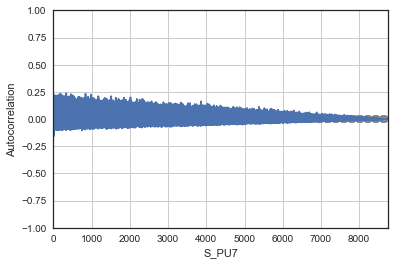

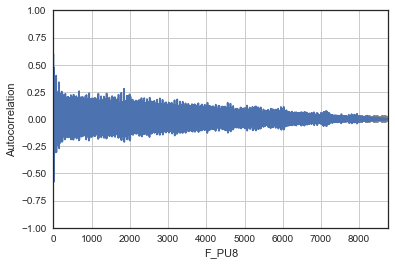

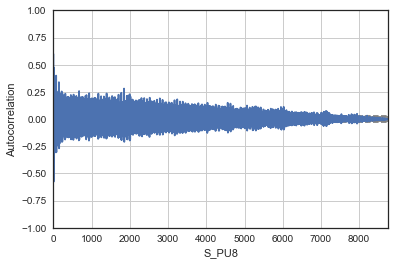

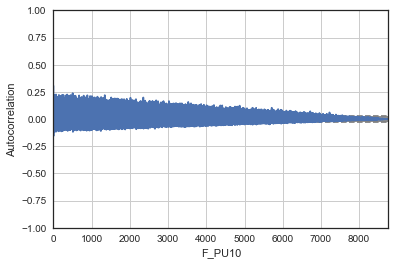

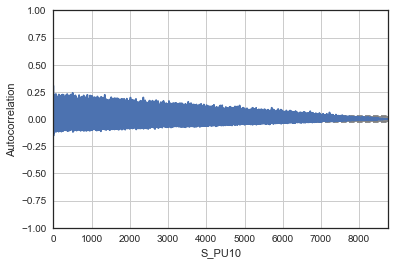

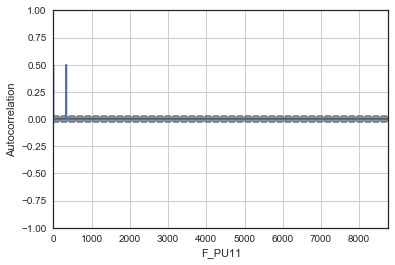

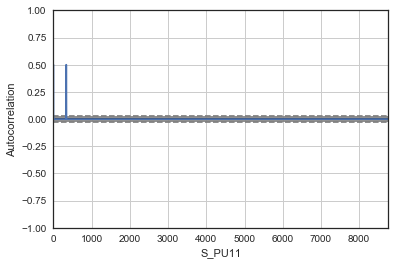

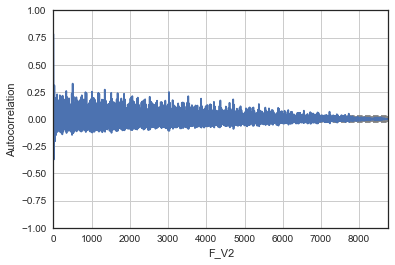

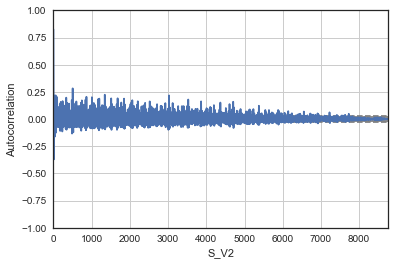

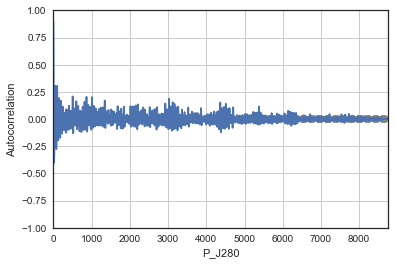

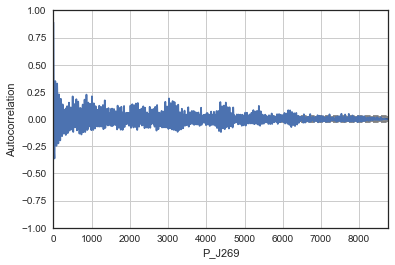

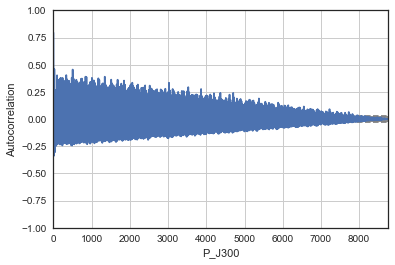

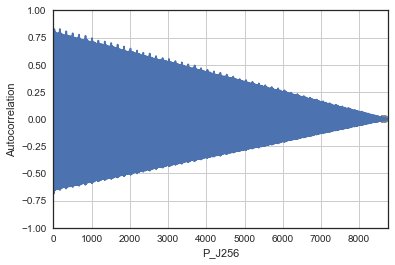

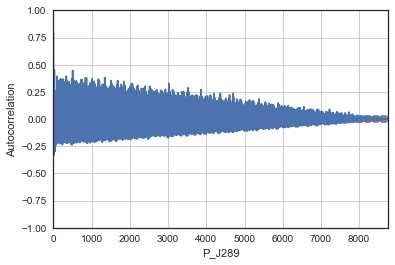

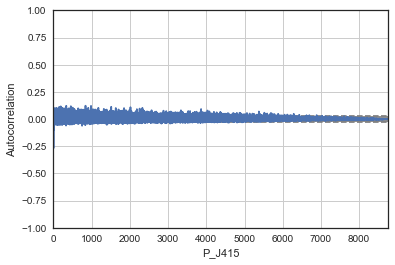

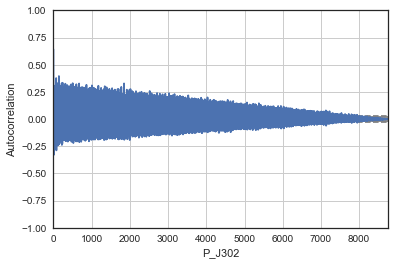

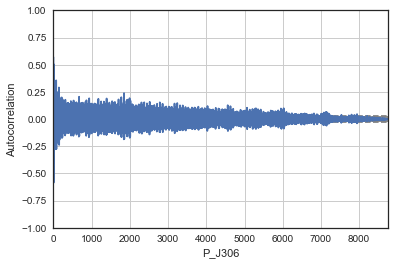

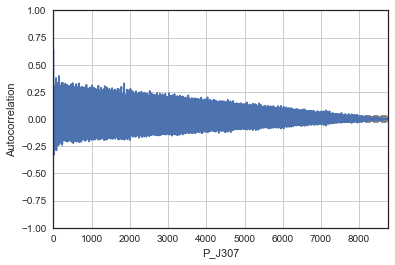

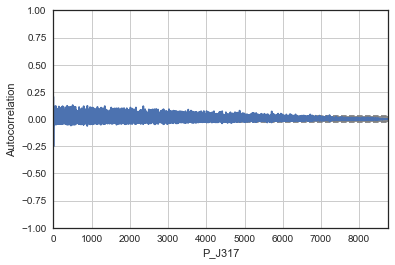

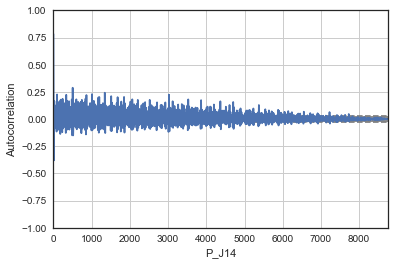

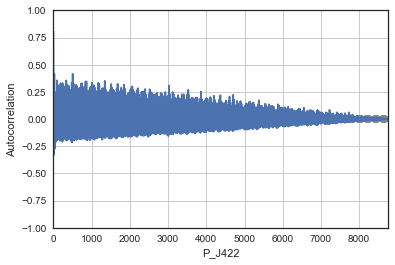

In [5]:
from pandas.tools.plotting import autocorrelation_plot

for i in range(len(data.columns)):
    a = data.iloc[:,i]
    autocorrelation_plot(a)
    plt.xlabel(str(data.columns.values[i]))
    plt.show()

In [6]:
from statsmodels.tsa.arima_model import ARIMA